In [1]:
# necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
import math
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
energy_data = pd.read_csv('energy_dataset.csv')

In [5]:
#initial 5 rows
energy_data.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17,NaN,6436,26118,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16,NaN,5856,24934,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8,NaN,5454,23515,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2,NaN,5151,22642,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9,NaN,4861,21785,20264.0,38.41,56.04


In [7]:
#type of data in each column
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [9]:
#description of data
energy_data.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [11]:
energy_data.tail()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
35059,2018-12-31 19:00:00+01:00,297.0,0.0,0.0,7634.0,2628.0,178.0,0.0,0.0,0.0,...,277.0,0.0,3113.0,96,NaN,3253,30619,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,0.0,7241.0,2566.0,174.0,0.0,0.0,0.0,...,280.0,0.0,3288.0,51,NaN,3353,29932,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,0.0,7025.0,2422.0,168.0,0.0,0.0,0.0,...,286.0,0.0,3503.0,36,NaN,3404,27903,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,0.0,6562.0,2293.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3586.0,29,NaN,3273,25450,25801.0,63.93,69.89
35063,2018-12-31 23:00:00+01:00,290.0,0.0,0.0,6926.0,2166.0,163.0,0.0,0.0,0.0,...,287.0,0.0,3651.0,26,NaN,3117,24424,24455.0,64.27,69.88


In [13]:
energy_data.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [15]:
#checking duplicate rows
energy_data.duplicated().sum()

0

In [17]:
#checking duplicate values in each column
energy_data.isnull().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [19]:
#removing insignificant or unnecessary data
energy_data = energy_data.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'], axis=1)

In [21]:
#dropping rows with null values
energy_data = energy_data.dropna()

In [23]:
energy_data.isnull().sum()

time                                           0
generation biomass                             0
generation fossil brown coal/lignite           0
generation fossil coal-derived gas             0
generation fossil gas                          0
generation fossil hard coal                    0
generation fossil oil                          0
generation fossil oil shale                    0
generation fossil peat                         0
generation geothermal                          0
generation hydro pumped storage consumption    0
generation hydro run-of-river and poundage     0
generation hydro water reservoir               0
generation marine                              0
generation nuclear                             0
generation other                               0
generation other renewable                     0
generation solar                               0
generation waste                               0
generation wind offshore                       0
generation wind onsh

In [25]:
energy_data.nunique()

time                                           35017
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8293
generation fossil hard coal                     7265
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                                5331
generation waste                              

In [27]:
#finding percentage of missing values in every column
round((energy_data.isna().sum() / len(energy_data)) * 100, 2)

time                                           0.0
generation biomass                             0.0
generation fossil brown coal/lignite           0.0
generation fossil coal-derived gas             0.0
generation fossil gas                          0.0
generation fossil hard coal                    0.0
generation fossil oil                          0.0
generation fossil oil shale                    0.0
generation fossil peat                         0.0
generation geothermal                          0.0
generation hydro pumped storage consumption    0.0
generation hydro run-of-river and poundage     0.0
generation hydro water reservoir               0.0
generation marine                              0.0
generation nuclear                             0.0
generation other                               0.0
generation other renewable                     0.0
generation solar                               0.0
generation waste                               0.0
generation wind offshore       

In [29]:
#dropping the time column as it's of no further use
energy_data = energy_data.drop(['time'], axis=1)

In [31]:
#finding the correlation between the features
energy_data.corr()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage consumption,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
generation biomass,1.000000,0.229608,NaN,-0.021187,0.433113,0.458499,NaN,NaN,NaN,-0.044836,...,-0.005010,-0.348220,NaN,-0.069010,-0.008692,-0.072183,0.085351,0.083211,0.108867,0.142799
generation fossil brown coal/lignite,0.229608,1.000000,NaN,0.500119,0.768905,0.314732,NaN,NaN,NaN,-0.323907,...,0.040535,0.282625,NaN,-0.434509,0.042471,-0.436250,0.278777,0.280531,0.568146,0.364206
generation fossil coal-derived gas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil gas,-0.021187,0.500119,NaN,1.000000,0.542141,0.310711,NaN,NaN,NaN,-0.420602,...,0.074938,0.276167,NaN,-0.397280,0.080235,-0.397565,0.543711,0.548947,0.640889,0.461918
generation fossil hard coal,0.433113,0.768905,NaN,0.542141,1.000000,0.440374,NaN,NaN,NaN,-0.406085,...,0.046091,0.170160,NaN,-0.442063,0.047454,-0.444425,0.394443,0.396637,0.671667,0.466703
generation fossil oil,0.458499,0.314732,NaN,0.310711,0.440374,1.000000,NaN,NaN,NaN,-0.331405,...,0.099879,-0.177810,NaN,-0.052254,0.096547,-0.058051,0.499435,0.497069,0.293068,0.285351
generation fossil oil shale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation fossil peat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation geothermal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation hydro pumped storage consumption,-0.044836,-0.323907,NaN,-0.420602,-0.406085,-0.331405,NaN,NaN,NaN,1.000000,...,-0.214677,-0.188762,NaN,0.389000,-0.222111,0.390459,-0.559710,-0.562790,-0.600351,-0.427032


In [33]:
#using the pearson correlation
correlations = energy_data.corr(method='pearson')

In [35]:
#sorting the features according to the correlation coefficient
print(correlations['price actual'].sort_values(ascending=False), '\n')

price actual                                   1.000000
price day ahead                                0.733508
generation fossil hard coal                    0.466703
generation fossil gas                          0.461918
total load forecast                            0.436235
total load actual                              0.435873
generation fossil brown coal/lignite           0.364206
generation fossil oil                          0.285351
generation other renewable                     0.256398
generation waste                               0.169290
generation biomass                             0.142799
forecast solar day ahead                       0.101463
generation other                               0.099759
generation solar                               0.098774
generation hydro water reservoir               0.072210
generation nuclear                            -0.051817
generation hydro run-of-river and poundage    -0.136752
generation wind onshore                       -0

In [37]:
null_values= ['generation marine',
                 'generation geothermal',
                 'generation fossil peat',
                 'generation wind offshore',
                 'generation fossil oil shale',
                 'generation fossil coal-derived gas']


In [39]:
#dropping the columns that don't contribute 
heat_map = energy_data.drop(null_values, axis=1)

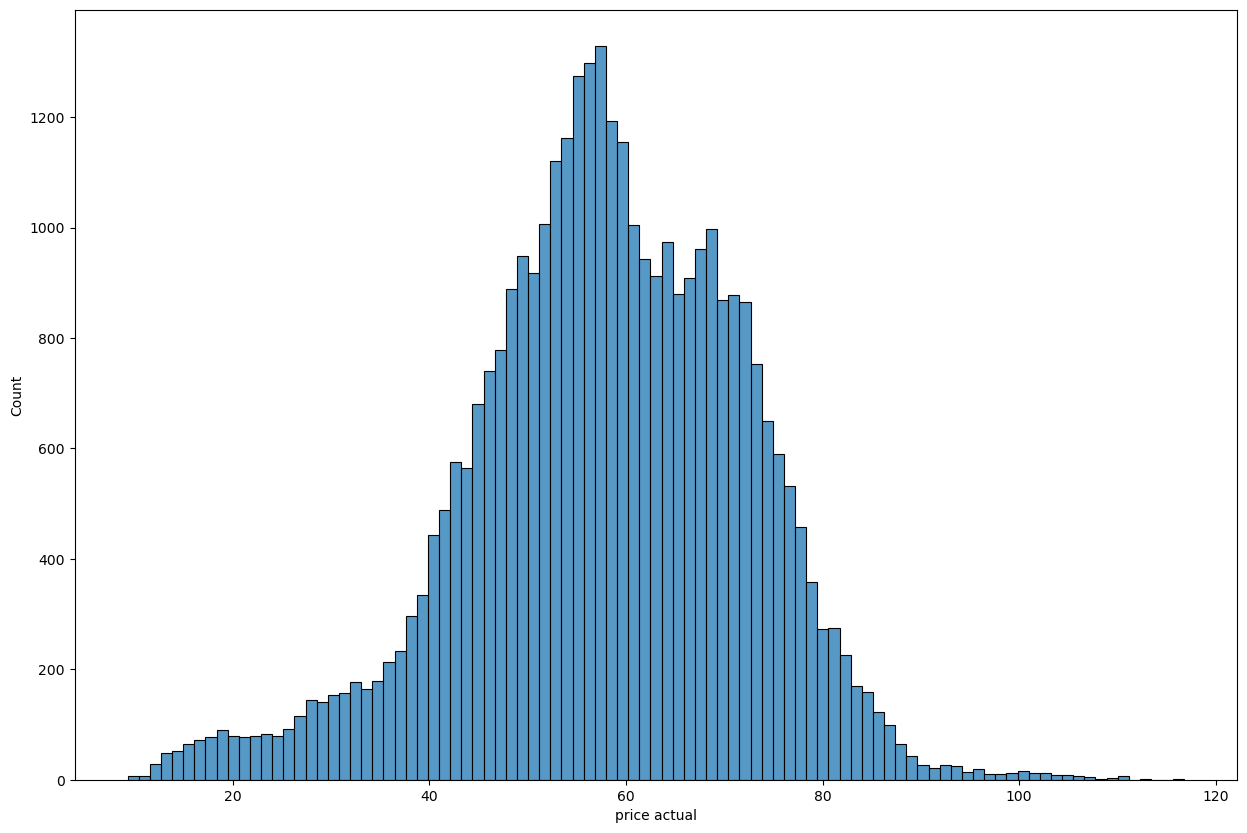

In [41]:
# X-axis: Represents the values of price actual (the actual energy price).
# Y-axis: Represents the frequency or count of observations within each bin (how many times a particular price range occurs).
plt.figure(figsize=(15,10))
sns.histplot(energy_data, x = 'price actual')
plt.show()

<Axes: xlabel='price actual', ylabel='price day ahead'>

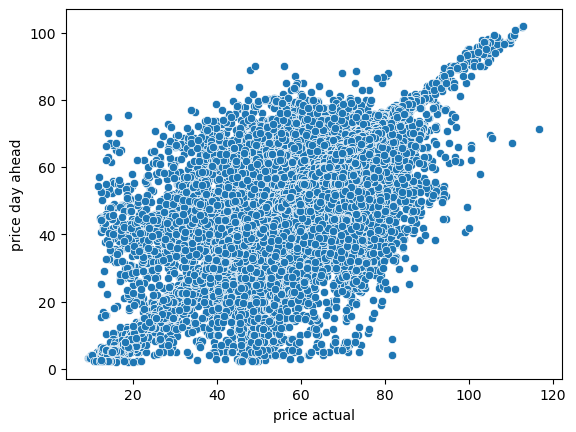

In [43]:
# X-axis: Represents the values of price actual (the actual energy price).
# Y-axis: Represents the values of price day ahead (the predicted energy price for the next day).

sns.scatterplot(x='price actual', y='price day ahead', data=energy_data)

In [45]:
#x: all the features affecting the actual price
x = energy_data.drop(['price actual'], axis=1)
y = energy_data['price actual']

In [47]:
print(x.shape)
print(y.shape)

(35017, 25)
(35017,)


In [49]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [51]:
print(type(y))

<class 'pandas.core.series.Series'>


In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
# transforms your feature data (x) by scaling each feature to a given range, typically between 0 and 1.
x = scaler.transform(x)

In [55]:
#splitting the data into training and testing set, with testing size being 20% of the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

# Define the model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [83]:
y_predicted = model.predict(x_test)

In [85]:
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.5733677491073159
Testing Accuracy : 0.5722372770459524


In [89]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 83.09513080741849
R-squared score: 0.5722372770459524


In [91]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
# Create a regressor object
regressor = RandomForestRegressor()

# Fit the model with training data
regressor.fit(x_train, y_train)

# Use the regressor to make predictions
y_predicted = regressor.predict(x_test)

In [97]:
print("Training Accuracy :", regressor.score(x_train, y_train))
print("Testing Accuracy :", regressor.score(x_test, y_test))

Training Accuracy : 0.9780481609284647
Testing Accuracy : 0.842781202185559


In [102]:
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 30.54056809709309
R-squared score: 0.842781202185559


In [57]:
#used to calculate the cost or error 
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        # Check if y is a pandas Series and handle indexing accordingly
        if isinstance(y, pd.Series):
            total_cost += (f_wb - y.iloc[i])**2  # Use iloc for integer-based indexing
        else:
            total_cost += (f_wb - y[i])**2
    total_cost /= (2 * m)
    return total_cost

In [59]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.
cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(cost)

1776.936859593756


In [61]:
#used to find the optimal values of w,b
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        # Access y using .iloc[i] to handle potential index issues
        err = f_wb - y.iloc[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_db, dj_dw

In [63]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.
dj_db, dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w,b: {dj_db}')
print(f'dj_dw at initial w,b: \n {dj_dw}')

dj_db at initial w,b: -57.885573840717164
dj_dw at initial w,b: 
 [-37.8087368  -27.80865558   0.         -16.99947262 -31.00928544
 -38.95402685   0.           0.           0.          -5.04560112
 -27.76177775 -15.71220927   0.         -50.85034547 -33.16262735
 -42.09643273 -14.69872301 -44.02784944   0.         -17.60945159
 -14.6590388  -17.08428762 -27.61875917 -28.11124087 -29.22385368]


In [65]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.2

tmp_dj_db, tmp_dj_dw = compute_gradient(x_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -57.68557384071714
dj_dw at initial w,b: 
 [-37.67911678 -27.71902994   0.         -16.94326254 -30.90761841
 -38.821069     0.           0.           0.          -5.02444578
 -27.66444786 -15.65853597   0.         -50.67435783 -33.04894017
 -41.95249229 -14.64931178 -43.87693062   0.         -17.54657871
 -14.60978879 -17.0232109  -27.52757692 -28.01839651 -29.1282009 ]


In [67]:
#this function iteratively adjusts the values of w,b to minimize the cost function, guiding the model towards better predictions.
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i < 100000:
            cost = cost_function(x, y, w, b)
            if i % math.ceil(num_iters / 10) == 0:
                print(f'Iteration {i:4d}: Cost {float(cost):8.2f}   ')
    return w, b, J_history, w_history

In [69]:
initial_w = np.zeros(x.shape[1])
initial_b = 0.

iterations = 1000
alpha = 5.0e-7

w, b, J_history, w_history = gradient_descent(x_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print(f"w,b found by gradient descent: {w}, {b}")

Iteration    0: Cost  1776.93   
Iteration  100: Cost  1775.92   
Iteration  200: Cost  1774.91   
Iteration  300: Cost  1773.90   
Iteration  400: Cost  1772.89   
Iteration  500: Cost  1771.88   
Iteration  600: Cost  1770.88   
Iteration  700: Cost  1769.87   
Iteration  800: Cost  1768.87   
Iteration  900: Cost  1767.86   
w,b found by gradient descent: [0.01887633 0.01388414 0.         0.0084874  0.01548211 0.01944815
 0.         0.         0.         0.00251867 0.01386012 0.0078444
 0.         0.02538729 0.01655664 0.02101721 0.00733826 0.02198138
 0.         0.00879134 0.00731845 0.00852915 0.01378905 0.01403493
 0.01459096], 0.02889983765828439


In [71]:
#weights of all the features
feature_names = energy_data.drop('price actual', axis=1).columns
feature_weights = pd.Series(w, index=feature_names)
print(feature_weights)

generation biomass                             0.018876
generation fossil brown coal/lignite           0.013884
generation fossil coal-derived gas             0.000000
generation fossil gas                          0.008487
generation fossil hard coal                    0.015482
generation fossil oil                          0.019448
generation fossil oil shale                    0.000000
generation fossil peat                         0.000000
generation geothermal                          0.000000
generation hydro pumped storage consumption    0.002519
generation hydro run-of-river and poundage     0.013860
generation hydro water reservoir               0.007844
generation marine                              0.000000
generation nuclear                             0.025387
generation other                               0.016557
generation other renewable                     0.021017
generation solar                               0.007338
generation waste                               0

In [73]:
y_pred = np.dot(x_test, w) + b

In [75]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error {mse}")

Mean Squared Error 3525.8020572082423


In [77]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -17.150361807406078
